<a href="https://colab.research.google.com/github/Gab0Mtz/semanatec-mayo-22/blob/main/6_3_Actividad_Regresion_Linea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad
Equipo 3

- Gabriel Martínez Berrones: A00517149
- Alfredo Hernández Lucio: A00830196
- Juan Pablo Chávez Moreira: A01721844

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Esta actividad se evaluará de acuerdo a la rúbrica en Canvas.

Al integrante que no participe en la actividad no se le tomará en cuenta para la calificación.

El límite para entregar las actividades es el viernes antes de las 23:59.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


**Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/SemanaTec/arte-analitica
insurance = pd.read_csv('data/insurance.csv')

Mounted at /gdrive
/gdrive/MyDrive/SemanaTec/arte-analitica


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [3]:
insurance['smoker'] = insurance['smoker'].replace(['yes'],'1')
insurance['smoker'] = insurance['smoker'].replace(['no'],'0')
insurance['region'] = insurance['region'].replace(['northeast'],'0')
insurance['region'] = insurance['region'].replace(['southeast'],'1')
insurance['region'] = insurance['region'].replace(['southwest'],'2')
insurance['region'] = insurance['region'].replace(['northwest'],'3')
insurance['sex'] = insurance['sex'].replace(['male'],'0')
insurance['sex'] = insurance['sex'].replace(['female'],'1')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

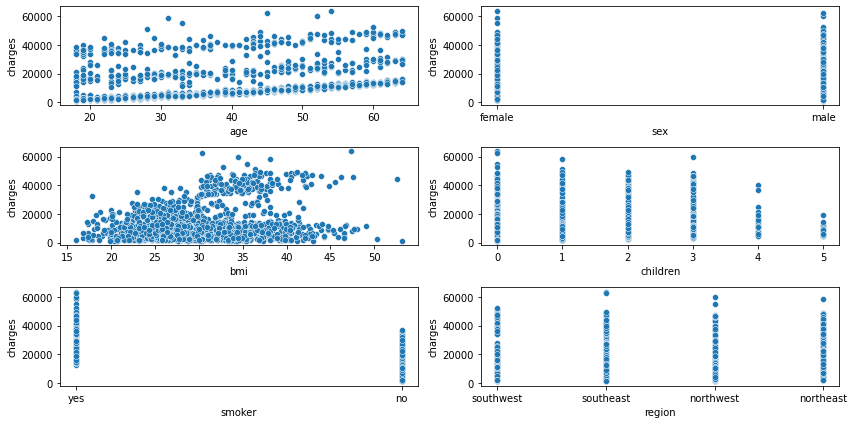

In [ ]:
fig, axs= plt.subplots(3,2, figsize=(12, 6))
sns.scatterplot(data=insurance, x = 'age', y='charges',ax=axs[0][0])
sns.scatterplot(data=insurance, x = 'sex', y='charges',ax=axs[0][1])
sns.scatterplot(data=insurance, x = 'bmi', y='charges',ax=axs[1][0])
sns.scatterplot(data=insurance, x = 'children', y='charges',ax=axs[1][1])
sns.scatterplot(data=insurance, x = 'smoker', y='charges',ax=axs[2][0])
sns.scatterplot(data=insurance, x = 'region', y='charges',ax=axs[2][1])
plt.tight_layout()

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

In [ ]:
#El costo del seguro es mayor entre los 45 y 55 años.
#El género no aparenta tener algún tipo de relación con el precio del seguro.
#La relación entre el BMI y el costo del seguro es difusa.
#Entre menos hijos tenga una persona, mayor es el costo del seguro.
#Los fumadores presentan un mayor costo en su seguro.
#Al ser del suroeste se cobra menos por el seguro.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [4]:
# Edad
lm1 = LinearRegression()
lm1.fit(insurance[['age']], insurance['charges'])
print('Age')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(insurance[['age']], insurance['charges']), '\n')

# BMI
lm2 = LinearRegression()
lm2.fit(insurance[['bmi']], insurance['charges'])
print('BMI')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(insurance[['bmi']], insurance['charges']), '\n')

# Children
lm3 = LinearRegression()
lm3.fit(insurance[['children']], insurance['charges'])
print('Children')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(insurance[['children']], insurance['charges']), '\n')

# Sex
lm4 = LinearRegression()
lm4.fit(insurance[['sex']], insurance['charges'])
print('Sex')
print('beta_0: ', lm4.intercept_)
print('beta_1: ', lm4.coef_)
print('Score: ', lm4.score(insurance[['sex']], insurance['charges']), '\n')

# Smoker
lm5 = LinearRegression()
lm5.fit(insurance[['smoker']], insurance['charges'])
print('Smoker')
print('beta_0: ', lm5.intercept_)
print('beta_1: ', lm5.coef_)
print('Score: ', lm5.score(insurance[['smoker']], insurance['charges']), '\n')

# Region
lm6 = LinearRegression()
lm6.fit(insurance[['region']], insurance['charges'])
print('Region')
print('beta_0: ', lm6.intercept_)
print('beta_1: ', lm6.coef_)
print('Score: ', lm6.score(insurance[['region']], insurance['charges']), '\n')

Age
beta_0:  3165.885006063021
beta_1:  [257.72261867]
Score:  0.08940589967885804 

BMI
beta_0:  1192.9372089611497
beta_1:  [393.8730308]
Score:  0.03933913991786264 

Children
beta_0:  12522.495549644098
beta_1:  [683.08938248]
Score:  0.004623758854459203 

Sex
beta_0:  13956.751177721893
beta_1:  [-1387.17233389]
Score:  0.003282380391360862 

Smoker
beta_0:  8434.2682978562
beta_1:  [23615.96353368]
Score:  0.6197648148218988 

Region
beta_0:  14088.745390518741
beta_1:  [-550.48584301]
Score:  0.0025226707691909933 



5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

#Modelos de mejor a peor
1. Smoker - Charges
2. Age - Charges
3. BMI - Charges
4. Children - Charges
5. Sex - Charges
6. Region - Charges

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

In [7]:
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

# Edad y Niños
lm7 = LinearRegression()
lm7.fit(insurance[['age', 'children']], insurance['charges'])
print('Age and Children')
print('beta_0: ', lm7.intercept_)
print('betas: ', lm7.coef_)
print('Score: ', lm7.score(insurance[['age', 'children']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['age', 'children']],
                                   insurance['charges'], lm7), '\n')

# Edad y Region
lm8 = LinearRegression()
lm8.fit(insurance[['age', 'region']], insurance['charges'])
print('Age and Region')
print('beta_0: ', lm8.intercept_)
print('betas: ', lm8.coef_)
print('Score: ', lm8.score(insurance[['age', 'region']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['age', 'region']],
                                   insurance['charges'], lm8), '\n')

# Edad y BMI
lm9 = LinearRegression()
lm9.fit(insurance[['age', 'bmi']], insurance['charges'])
print('Age and BMI')
print('beta_0: ', lm9.intercept_)
print('betas: ', lm9.coef_)
print('Score: ', lm9.score(insurance[['age', 'bmi']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['age', 'bmi']],
                                   insurance['charges'], lm9), '\n')

# Niños y Region
lm10 = LinearRegression()
lm10.fit(insurance[['children', 'region']], insurance['charges'])
print('Children and Region')
print('beta_0: ', lm10.intercept_)
print('betas: ', lm10.coef_)
print('Score: ', lm10.score(insurance[['children', 'region']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['children', 'region']],
                                   insurance['charges'], lm10), '\n')

# Niños y BMI
lm11 = LinearRegression()
lm11.fit(insurance[['children', 'bmi']], insurance['charges'])
print('Children and BMI')
print('beta_0: ', lm11.intercept_)
print('betas: ', lm11.coef_)
print('Score: ', lm11.score(insurance[['children', 'bmi']], insurance['charges']))
print('Score ajustado:', score_adj(insurance[['children', 'bmi']],
                                   insurance['charges'], lm11), '\n')


Age and Children
beta_0:  2636.0417416124474
betas:  [255.69471256 556.52710886]
Score:  0.09246947629807334
Score ajustado: 0.09110988000788312 

Age and Region
beta_0:  3992.438162566252
betas:  [ 257.83748204 -559.05165463]
Score:  0.0920076713207213
Score ajustado: 0.09064738318786847 

Age and BMI
beta_0:  -6424.804612240765
betas:  [241.9307779  332.96509081]
Score:  0.11718338606939949
Score ajustado: 0.11586081436313644 

Children and Region
beta_0:  13361.278530463189
betas:  [ 702.50652477 -578.55090085]
Score:  0.007406473845163353
Score ajustado: 0.0059194423453059475 

Children and BMI
beta_0:  523.5994914397634
betas:  [657.7746999  392.21400059]
Score:  0.043625846244526145
Score ajustado: 0.04219307597672772 



 7. ¿Cuál modelo es el que nos conviene elegir?

* El modelo que más conviene es el de edad y niños contra costo, debido a que es el más "perfecto" de todos los modelos, siendo el que más se acerca a 1 (tomando en consideración su score ajustado).

8. Conclusiones 

- A00517149 - Gabriel Martínez Berrones: La actividad realizada es una práctica bastante buena para poder prepararse dentro del ámbito del análisis de datos, siendo que se nos muestra el cómo obtener información de un determinado lugar y el cómo procesarla para obtener los resultados deseados.
- A00830196 - Alfredo Hernández Lucio: Esta actividad nos permite ver cómo el tener datos no es tener información, si no que hay que realizar un análisis que nos permita ver con claridad qué significan los datos e interpretarlos para poder llegar a conclusiones.
- A01721844 - Juan Pablo Chávez Moreira: Esta actividad fue muy útil, no solo para la sintaxis que aprendí, sino también para aprender acerda de la correlación. Se me hizo muy divertido trabajar con datos reales y poder estimar un resultado con los datos que nos daban.

# Guardar el resultado como pdf


* Escribe aquí abajo la liga de tu repositorio.

* (Haz doble clic en esta celda y copia la URL dentro del paréntesis)

[Liga al repositorio de Gabriel](https://github.com/Gab0Mtz/semanatec-mayo-22.git)

* Exporta el notebook a formato HTML.

In [ ]:
! jupyter nbconvert --to HTML '/gdrive/MyDrive/SemanaTec/arte-analitica/6.3-Actividad_Regresion_Linea.ipynb'

* Haz doble clic en el archivo nuevo que se creó dentro de la carpeta `arte-analitica` y en la parte superior derecha dale clic en **imprimir**

* Imprime el archivo como *PDF* y súbelo a Canvas.